<a href="https://colab.research.google.com/github/RSKothari/Learn-Backprop/blob/main/Line_Fitting_using_Least_Squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#  Load required packages
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def generate_points(num_pts=1000, mode='linear', add_noise=True):
  
  if mode == 'linear':
    #  Generate random points along a line
    random_slope = 20*np.random.rand(1, ) - 10  # Random slope
    random_intercept = 200*np.random.rand(1, ) - 100  # Random intercept

    x_values = 150*np.random.rand(num_pts, )
    y_values = random_slope*x_values + random_intercept

    #  Play with numbers here to change the noise level
    x_noise = np.random.normal(0, 25, num_pts) if add_noise else 0
    y_noise = np.random.normal(0, 40, num_pts) if add_noise else 0

    gt_params = {'slope': random_slope,
                 'intercept': random_intercept}

    #  Return values
    return (x_values + x_noise, y_values + y_noise, gt_params)

# Introduction

Rome was not built in a day. The same is true for all of Machine Learning and Pattern Recognition as we know it today. Many complex algorithms stand on the unshakeable simplicity of fundamentals. This notebook covers one such fundaments - line fitting.

Given $N$ data points, $P \in (p_0, p_1, p_2, ... p_i ... p_N)$ \\
Each data point $p_i = (x_i, y_i)$

Find the parameters of a line $l$ which best fits all the points. The parameters of a line are slope $M$ and intercept $C$.

# Basics

Text(0.5, 1.0, 'Example of line fitting')

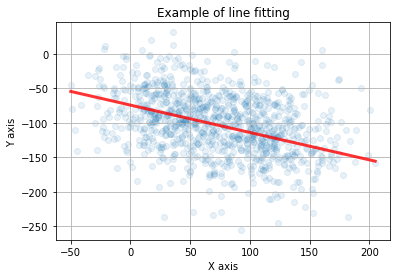

In [47]:
x_pts, y_pts, gt_params = generate_points(add_noise=True)

x_start = x_pts.min()
y_start = gt_params['slope']*x_start + gt_params['intercept']

x_end = x_pts.max()
y_end = gt_params['slope']*x_end + gt_params['intercept']

fig, axs = plt.subplots()
axs.scatter(x_pts, y_pts, alpha=0.1)
axs.plot([x_start, x_end], [y_start, y_end], 'r-', linewidth=3, alpha=0.8)
axs.set_xlabel('X axis')
axs.set_ylabel('Y axis')
axs.axis('on')
axs.grid('on')
axs.set_title('Example of line fitting')

Our task is to find the parameters of the red line given blue data points.

 # The method of Least Squares

The variables $M$ and $C$ are unknown.

We can write each $y_i = M x_i + C$, or in a simpler matrix form:

$
[y_i] = [M, C] \times [x_i, 1]^T \\
Y_{(1\times N)} = H_{(1\times \underline{2})} \times X_{(\underline{2} \times N)}
$

Expanding this matrix form returns the canonical line equation. This matrix form can also be verified by confirm that the matrix shapes align and respect the requirements for a validation matrix multiplication operation.

Then the method of least squares allows us to solve for $H$:

$ H = Y X^+ $, where $X^+$ is the pseudo inverse of $X$

# Pseudo Inverse

Why do we need a special "pseudo" inverse? For this, I urge the student to read the properies of an [invertible matrix](https://en.wikipedia.org/wiki/Invertible_matrix).

One of the fundamental requirements for a matrix to be invertible is that it must be a **square matrix**.

In our case, $X$ is almost never an invertible matrix. Why? Because $X$ will most likely never be a square matrix.

Let's look at the problem again.

$
Y = HX \\
YX^T = HXX^T \\
H = YX^T (XX^T)^{-1} = YX^+
$

This "trick" allows us to make $X$ invertible and allows us to find an estimate for H. Let's see what values we recover for our toy problem.

In [48]:
N = len(x_pts)  # Number of points
X = np.stack([x_pts, np.ones(N, )], axis=0)  # Create a 2XN X matrix
Y = y_pts.reshape(1, N)  # Create a 1XN Y matrix

X_pseudo = X.T.dot(np.linalg.inv(X.dot(X.T)))

H = Y.dot(X_pseudo)

print('The recovered slope is: %f. Groundtruth is: %f' % (H[0][0], gt_params['slope']))
print('The recovered intercept is: %f. Groundtruth is: %f' % (H[0][1], gt_params['intercept']))

The recovered slope is: -0.320219. Groundtruth is: -0.397416
The recovered intercept is: -78.684140. Groundtruth is: -74.329446


Let's re-run by adding noise to the earlier points. Change the `add_noise` parameter to `True`.

# Homework

Play with the `generate_points` function and change the level of noise. Do you see a pattern between the recovered slope and intercept with the amount of noise?